<a href="https://colab.research.google.com/github/shivamsingh163248/Data_Mining_and_Warehousing_CSBM505_M.Tech_NIT-D/blob/main/%20%20Pogramming%20laboratory%20/Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Given the NetCDF file of sea surface temperature dataset. Extract essential features
## such as variables, latitude, longitude, time and dimensions. Subsequently, perform the
## following operations:
## (a) Display the raw data.


In [ ]:
import xarray as xr

# Load the NetCDF file
file_path = 'ERA5_SST_3h_monmean_7923.nc'
dataset = xr.open_dataset(file_path)

# Extract the sea surface temperature variable
sst = dataset['sst']

# Extract essential features
latitude = dataset['latitude']
longitude = dataset['longitude']
time = dataset['time']
dimensions = dataset.dims  # Dimensions of the dataset

# Display the essential features
print("Variables in the dataset:", dataset.variables)
print("Latitude values:", latitude.values)
print("Longitude values:", longitude.values)
print("Time values:", time.values)
print("Dimensions of the dataset:", dimensions)

# Display raw SST data for the first few time steps (if it's large, you may want to slice it)
print("\nRaw SST data (first 5 time steps):")
print(sst.isel(time=slice(0, 5)))

# Optional: Display basic summary information about the dataset
print("\nSummary of the dataset:")
print(dataset)

Variables in the dataset: Frozen({'time': <xarray.IndexVariable 'time' (time: 540)> Size: 4kB
array(['1979-01-16T10:00:00.000000000', '1979-02-14T22:00:00.000000000',
       '1979-03-16T10:00:00.000000000', ..., '2023-10-16T10:00:00.000000000',
       '2023-11-15T22:00:00.000000000', '2023-12-16T10:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T, 'time_bnds': <xarray.Variable (time: 540, bnds: 2)> Size: 9kB
[1080 values with dtype=datetime64[ns]], 'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)> Size: 6kB
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 721)> Size: 3kB
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75

## (b) Apply masking to the data.

In [ ]:
#Drop NaN values
sst_cleaned = sst.dropna(dim="latitude", how="any").dropna(dim="longitude", how="any").dropna(dim="time", how="any")

# Check the result
print("Dat a cleaned by dropping NaN values:")
print(sst_cleaned)

# Assign the cleaned data back to the dataset if needed
dataset['sst_cleaned'] = sst_cleaned


Dat a cleaned by dropping NaN values:
<xarray.DataArray 'sst' (time: 540, latitude: 55, longitude: 1440)> Size: 171MB
array([[[271.45993, 271.45993, ..., 271.45993, 271.45993],
        [271.45993, 271.45993, ..., 271.45993, 271.45993],
        ...,
        [273.63123, 273.61996, ..., 273.57788, 273.60452],
        [273.61963, 273.621  , ..., 273.55487, 273.58905]],

       [[271.46002, 271.46002, ..., 271.46002, 271.46002],
        [271.46002, 271.46002, ..., 271.46002, 271.46002],
        ...,
        [274.44937, 274.4616 , ..., 274.30014, 274.37473],
        [274.39804, 274.42902, ..., 274.23666, 274.31952]],

       ...,

       [[271.4601 , 271.4601 , ..., 271.4601 , 271.4601 ],
        [271.4601 , 271.46005, ..., 271.4601 , 271.4601 ],
        ...,
        [271.4601 , 271.4601 , ..., 271.4601 , 271.4601 ],
        [271.4601 , 271.4601 , ..., 271.4601 , 271.4601 ]],

       [[271.46005, 271.46005, ..., 271.46005, 271.46005],
        [271.46005, 271.46005, ..., 271.46005, 271.46005]

In [ ]:
# Define the mask condition for values
mask_condition = (sst_cleaned < 270) | (sst > 310)

# Apply the mask: set masked values to NaN
sst_masked = sst_cleaned.where(~mask_condition)

print("SST after masking based on value range:")
print(sst_masked)


SST after masking based on value range:
<xarray.DataArray 'sst' (time: 540, latitude: 55, longitude: 1440)> Size: 171MB
array([[[271.45993, 271.45993, 271.45993, ..., 271.45993, 271.45993,
         271.45993],
        [271.45993, 271.45993, 271.45993, ..., 271.45993, 271.45993,
         271.45993],
        [271.45993, 271.45993, 271.45993, ..., 271.45993, 271.45993,
         271.45993],
        ...,
        [273.6343 , 273.61365, 273.59277, ..., 273.51785, 273.57678,
         273.60562],
        [273.63123, 273.61996, 273.60867, ..., 273.52408, 273.57788,
         273.60452],
        [273.61963, 273.621  , 273.6345 , ..., 273.51282, 273.55487,
         273.58905]],

       [[271.46002, 271.46002, 271.46002, ..., 271.46002, 271.46002,
         271.46002],
        [271.46002, 271.46002, 271.46002, ..., 271.46002, 271.46002,
         271.46002],
        [271.46002, 271.46002, 271.46002, ..., 271.46002, 271.46002,
         271.46002],
...
        [271.4601 , 271.4601 , 271.4601 , ..., 271.

## (c) Modify the colormap, and adjust the maximum and minimum values for enhanced
## visualization.

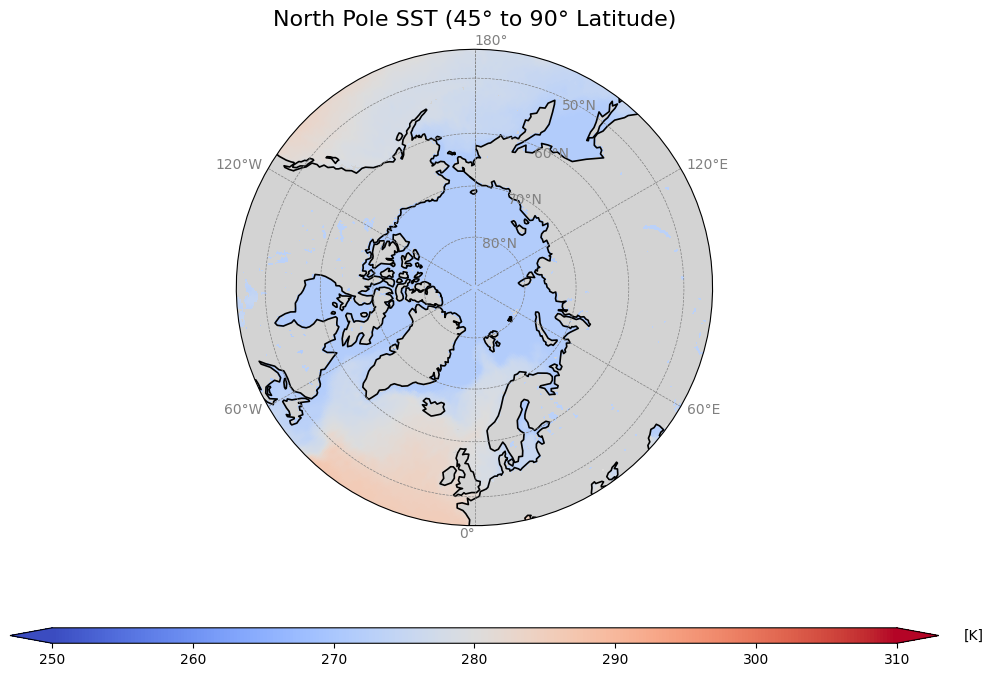

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath

# Load latitude, longitude, and SST data
latitude = dataset['latitude'].values
longitude = dataset['longitude'].values
sst = dataset['sst'].isel(time=0).values  # Select first time step

# Mask SST data where there is no data (NaN values)
sst_masked = np.ma.masked_invalid(sst)

# Convert latitude and longitude to cell boundaries
lat_edges = np.linspace(latitude[0] - 0.25/2, latitude[-1] + 0.25/2, len(latitude) + 1)
lon_edges = np.linspace(longitude[0] - 0.25/2, longitude[-1] + 0.25/2, len(longitude) + 1)

# Plot the data
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={"projection": ccrs.NorthPolarStereo()},
)
vmin = 275
vmax = 283.5

# Set extent and plot SST data
ax.set_extent([-180, 180, 45, 90], crs=ccrs.PlateCarree())
sst_plot = ax.pcolormesh(
    lon_edges, lat_edges, sst_masked,
    transform=ccrs.PlateCarree(), cmap="coolwarm", shading='auto',
    vmin=250,  # Set minimum value for color bar
    vmax=310
)

# Add coastlines
ax.coastlines(resolution='110m', color='black', linewidth=1.2)
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# Add gridlines
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linestyle="--",
    linewidth=0.5,
    color="gray"
)
gl.xlabels_top = False  # Disable top labels
gl.ylabels_right = False  # Disable right-side labels
gl.xlabel_style = {"size": 10, "color": "gray", "rotation" : 0}
gl.ylabel_style = {"size": 10, "color": "gray", "rotation" : 0}

# Add land and ocean features for better context (optional)
ax.add_feature(cfeature.LAND, facecolor="lightgrey")  # Light grey land
ax.add_feature(cfeature.OCEAN, facecolor="lightgrey")

# Add a colorbar

cbar = plt.colorbar(sst_plot, orientation='horizontal', aspect=60, extend='both')

# Manually add the label to the right of the colorbar
cbar.ax.text(
    1.08, 0.5,  # Position to the right of the colorbar (relative to the axes)
    '[K]',       # The label text
    transform=cbar.ax.transAxes,  # Use axes coordinates
    ha='left',    # Horizontal alignment
    va='center',# Vertical alignment
)
#cbar.set_label('(K)', loc='right',labelpad=20)  # Position the label at the right corner

cbar.set_ticks(np.arange(250, 311, 10))  # Define ticks from 250K to 310K
cbar.ax.tick_params(labelsize=10)

# Title and show plot
plt.title("North Pole SST (45° to 90° Latitude)", fontsize=16)
plt.tight_layout(rect=[0, 0.20, 1, 0.95])
plt.show()


## (d) Showcase the mean and standard deviation of the data

In [ ]:
import numpy as np

# Assuming dataset is already loaded
# Extract SST data
sst_data = dataset['sst'].values  # Full time series data

# Calculate the mean and standard deviation for each time step (ignoring NaNs)
sst_mean_per_time = np.nanmean(sst_data, axis=(1, 2))  # Mean across lat, lon for each time step
sst_std_per_time = np.nanstd(sst_data, axis=(1, 2))  # Standard deviation across lat, lon for each time step

# Get the overall mean and standard deviation across the time series
sst_mean = np.nanmean(sst_mean_per_time)  # Mean of mean SST values across time
sst_std = np.nanstd(sst_mean_per_time)   # Std deviation of mean SST values across time

# Get the max and min values for both mean and std deviation
max_sst_mean = np.nanmax(sst_mean_per_time)
min_sst_mean = np.nanmin(sst_mean_per_time)

max_sst_std = np.nanmax(sst_std_per_time)
min_sst_std = np.nanmin(sst_std_per_time)

# Print the results
print("Sea Surface Temperature (SST) Statistics:")
print(f"Mean SST: {sst_mean:.2f} K")
print(f"Standard Deviation of SST: {sst_std:.2f} K")
print(f"Maximum Mean SST: {max_sst_mean:.2f} K")
print(f"Minimum Mean SST: {min_sst_mean:.2f} K")
print(f"Maximum Standard Deviation of SST: {max_sst_std:.2f} K")
print(f"Minimum Standard Deviation of SST: {min_sst_std:.2f} K")


Sea Surface Temperature (SST) Statistics:
Mean SST: 286.88 K
Standard Deviation of SST: 0.23 K
Maximum Mean SST: 287.73 K
Minimum Mean SST: 286.30 K
Maximum Standard Deviation of SST: 12.09 K
Minimum Standard Deviation of SST: 11.36 K


## (e) Develop a code comprising four subplots, each displaying the raw data, masked
## data, mean and standard deviation

C:\Users\HP\AppData\Local\Temp\ipykernel_16348\1711269298.py:12: RuntimeWarning: Mean of empty slice
  sst_mean = np.nanmean(dataset['sst'].values, axis=0)  # Mean across time
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\HP\AppData\Local\Temp\ipykernel_16348\1711269298.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.20, 1, 0.95])


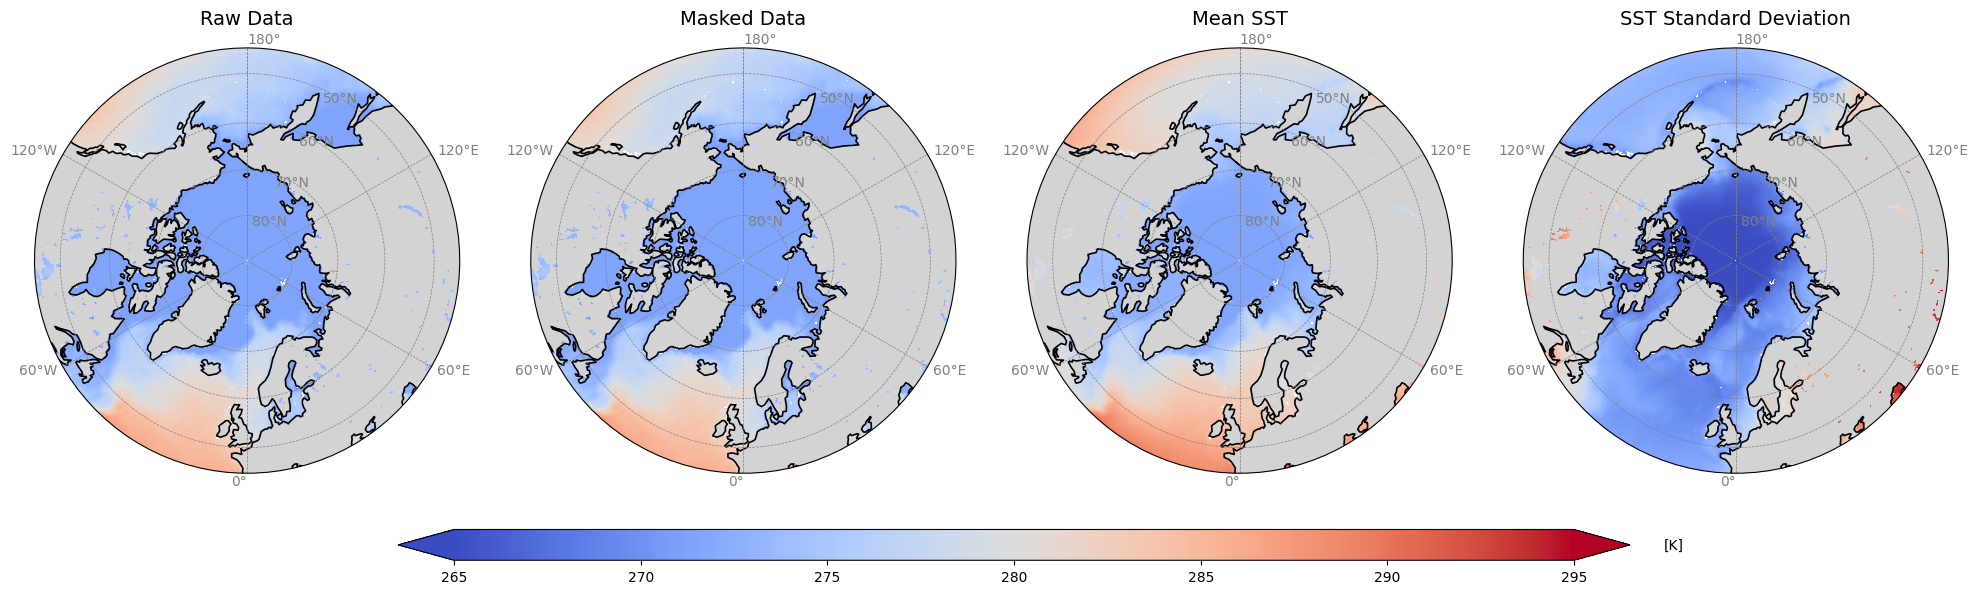

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath

# Assuming the dataset is already loaded
latitude = dataset['latitude'].values
longitude = dataset['longitude'].values
sst_raw = dataset['sst'].isel(time=0).values  # Raw data: Select first time step
sst_masked = np.ma.masked_where(sst_raw < 271, sst_raw)  # Masked data: SST < 271K
sst_mean = np.nanmean(dataset['sst'].values, axis=0)  # Mean across time
sst_std = np.nanstd(dataset['sst'].values, axis=0)  # Standard deviation across time

# Convert latitude and longitude to cell boundaries
lat_edges = np.linspace(latitude[0] - 0.25 / 2, latitude[-1] + 0.25 / 2, len(latitude) + 1)
lon_edges = np.linspace(longitude[0] - 0.25 / 2, longitude[-1] + 0.25 / 2, len(longitude) + 1)

# Create a figure with 4 subplots
fig, axes = plt.subplots(
    1, 4, figsize=(20, 8),
    subplot_kw={"projection": ccrs.NorthPolarStereo()}
)

# Titles for the plots
titles = ["Raw Data", "Masked Data", "Mean SST", "SST Standard Deviation"]
data = [sst_raw, sst_masked, sst_mean, sst_std]

# Set color range
vmin, vmax = 265, 295  # Uniform color bar range for all subplots

# Loop through the subplots
for ax, title, d in zip(axes, titles, data):
    ax.set_extent([-180, 180, 45, 90], crs=ccrs.PlateCarree())

    # Standard deviation needs to be scaled to the same range
    if title == "SST Standard Deviation":
        d_scaled = d / np.nanmax(d) * (vmax - vmin) + vmin  # Scale std deviation to 265-295
        plot = ax.pcolormesh(
            lon_edges, lat_edges, d_scaled,
            transform=ccrs.PlateCarree(),
            cmap="coolwarm",
            shading="auto",
            vmin=vmin, vmax=vmax
        )
    else:
        plot = ax.pcolormesh(
            lon_edges, lat_edges, d,
            transform=ccrs.PlateCarree(),
            cmap="coolwarm",
            shading="auto",
            vmin=vmin, vmax=vmax
        )

    # Add circular boundary
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    # Add coastlines
    ax.coastlines(resolution='110m', color='black', linewidth=1.2)

    # Add land feature with light grey color
    ax.add_feature(cfeature.LAND, facecolor='lightgrey')

    # Add gridlines with labels
    gl = ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linestyle="--",
        linewidth=0.5,
        color="gray"
    )
    gl.xlabels_top = False  # Disable top labels
    gl.ylabels_right = False  # Disable right-side labels
    gl.xlabel_style = {"size": 10, "color": "gray", "rotation": 0}
    gl.ylabel_style = {"size": 10, "color": "gray", "rotation": 0}

    # Add title to each subplot
    ax.set_title(title, fontsize=14)

# Add a shared colorbar
cbar = fig.colorbar(
    plot, ax=axes, orientation='horizontal', pad=0.1, fraction=0.05, aspect=40, extend = 'both'
)
#cbar.set_label('(K)', loc='right')
cbar.ax.text(
    1.08, 0.5,  # Position to the right of the colorbar (relative to the axes)
    '[K]',       # The label text
    transform=cbar.ax.transAxes,  # Use axes coordinates
    ha='left',    # Horizontal alignment
    va='center',# Vertical alignment
)
cbar.ax.tick_params(labelsize=10)

# Adjust layout and display
plt.tight_layout(rect=[0, 0.20, 1, 0.95])
plt.show()


## 2. Read SST data and generate the Nino3 time series and save it

Nino3 time series saved as 'nino3_time_series.csv'.


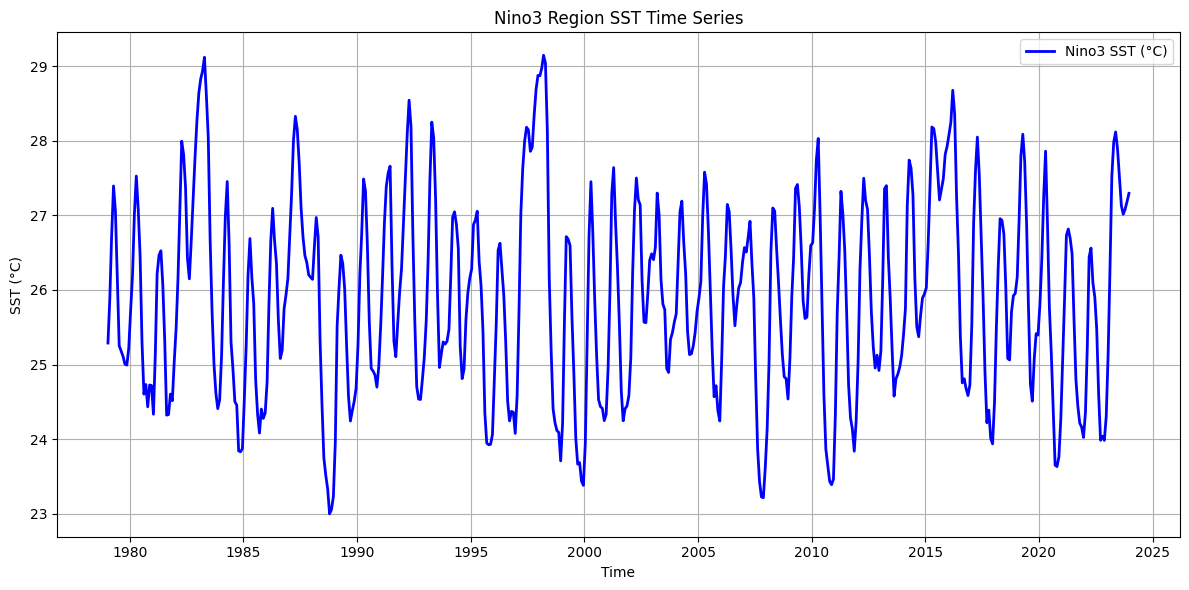

In [ ]:
import numpy as np
from netCDF4 import Dataset, num2date
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Path to the NetCDF file
file_path = "ERA5_SST_3h_monmean_7923.nc"  # Replace with your file path

# Open the NetCDF file
dataset = Dataset(file_path, mode="r")

# Access the variables
sst = dataset.variables["sst"][:]  # SST data
latitudes = dataset.variables["latitude"][:]
longitudes = dataset.variables["longitude"][:]

# Nino3 region: Latitude 5°S to 5°N and Longitude 150°W to 90°W
lat_min = -5
lat_max = 5
lon_min = 210  # 150°W = 210°E, 90°W = 270°E
lon_max = 270

# Find the indices corresponding to the Nino3 region
lat_indices = np.where((latitudes >= lat_min) & (latitudes <= lat_max))[0]
lon_indices = np.where((longitudes >= lon_min) & (longitudes <= lon_max))[0]

# Extract the Nino3 region data (subset the SST data)
sst_nino3 = sst[:, lat_indices.min():lat_indices.max() + 1, lon_indices.min():lon_indices.max() + 1]

# Convert SST data from Kelvin to Celsius
sst_nino3_celsius = sst_nino3 - 273.15

# Compute the mean SST in the Nino3 region across latitudes and longitudes for each time step
nino3_time_series = np.mean(sst_nino3_celsius, axis=(1, 2))  # Averaging over latitude and longitude

# Create a time variable (convert from NetCDF time to readable dates)
time_var = dataset.variables["time"]
time = num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'gregorian'))

# Convert `cftime` objects to `datetime`
time_converted = [datetime.strptime(str(t), "%Y-%m-%d %H:%M:%S") for t in time]

# Save the Nino3 time series to a CSV file
nino3_df = pd.DataFrame({
    "time": pd.to_datetime(time_converted),  # Convert to pandas datetime
    "SST (°C)": nino3_time_series
})
nino3_df.to_csv("nino3_time_series.csv", index=False)
print("Nino3 time series saved as 'nino3_time_series.csv'.")

# Plot the Nino3 time series
plt.figure(figsize=(12, 6))
plt.plot(nino3_df["time"], nino3_df["SST (°C)"], label="Nino3 SST (°C)", color="blue", lw=2)
plt.xlabel("Time")
plt.ylabel("SST (°C)")
plt.title("Nino3 Region SST Time Series")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Close the dataset
dataset.close()


## 3. Detrend and normalize the Nino3 time series obtained from 2, enhancing its
## interpretability and comparability

Detrended and normalized Nino3 time series saved as 'normalized_nino3_time_series.csv'.


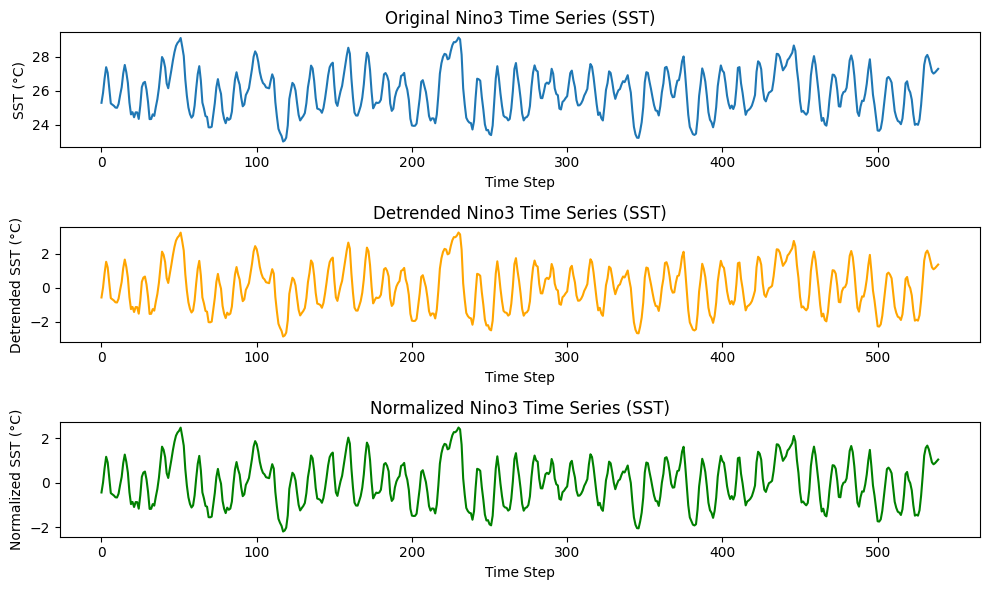

In [ ]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from scipy import signal
import matplotlib.pyplot as plt

# Load the Nino3 time series (we assume it was saved as 'nino3_time_series.csv' in the previous step)
nino3_df = pd.read_csv("nino3_time_series.csv")
nino3_time_series = nino3_df["SST (°C)"].values

# Step 1: Detrend the time series using a linear regression (or polynomial fitting if necessary)
# Here, we use a simple linear detrending approach
time_indices = np.arange(len(nino3_time_series))

# Fit a linear model (trend) to the data
coefficients = np.polyfit(time_indices, nino3_time_series, 1)  # 1st degree polynomial (linear trend)
linear_trend = np.polyval(coefficients, time_indices)

# Subtract the trend from the original data to detrend it
detrended_nino3 = nino3_time_series - linear_trend

# Step 2: Normalize the detrended time series (z-score normalization)
mean_detrended = np.mean(detrended_nino3)
std_detrended = np.std(detrended_nino3)
normalized_nino3 = (detrended_nino3 - mean_detrended) / std_detrended

# Save the detrended and normalized time series to a new CSV file
normalized_nino3_df = pd.DataFrame(normalized_nino3, columns=["Normalized SST (°C)"])
normalized_nino3_df.to_csv("normalized_nino3_time_series.csv", index=False)

print("Detrended and normalized Nino3 time series saved as 'normalized_nino3_time_series.csv'.")

# Step 3: Plot the original, detrended, and normalized time series for comparison
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(3, 1, 1)
plt.plot(nino3_time_series, label="Original Nino3 SST")
plt.title("Original Nino3 Time Series (SST)")
plt.xlabel("Time Step")
plt.ylabel("SST (°C)")

# Plot detrended data
plt.subplot(3, 1, 2)
plt.plot(detrended_nino3, label="Detrended Nino3 SST", color='orange')
plt.title("Detrended Nino3 Time Series (SST)")
plt.xlabel("Time Step")
plt.ylabel("Detrended SST (°C)")

# Plot normalized data
plt.subplot(3, 1, 3)
plt.plot(normalized_nino3, label="Normalized Nino3 SST", color='green')
plt.title("Normalized Nino3 Time Series (SST)")
plt.xlabel("Time Step")
plt.ylabel("Normalized SST (°C)")

plt.tight_layout()
plt.show()


## 4. Read SST data and compute seasonal climatology (mean) for different seasons (MAM,
## JJA, SON, DJF i.e., spring, summer, autumn and winter) and subplot each seasonal
## climatology for a comprehensive overview.

C:\Users\HP\AppData\Local\Temp\ipykernel_16348\2933527887.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.2, 1, 0.95])  # Adjust for colorbar space


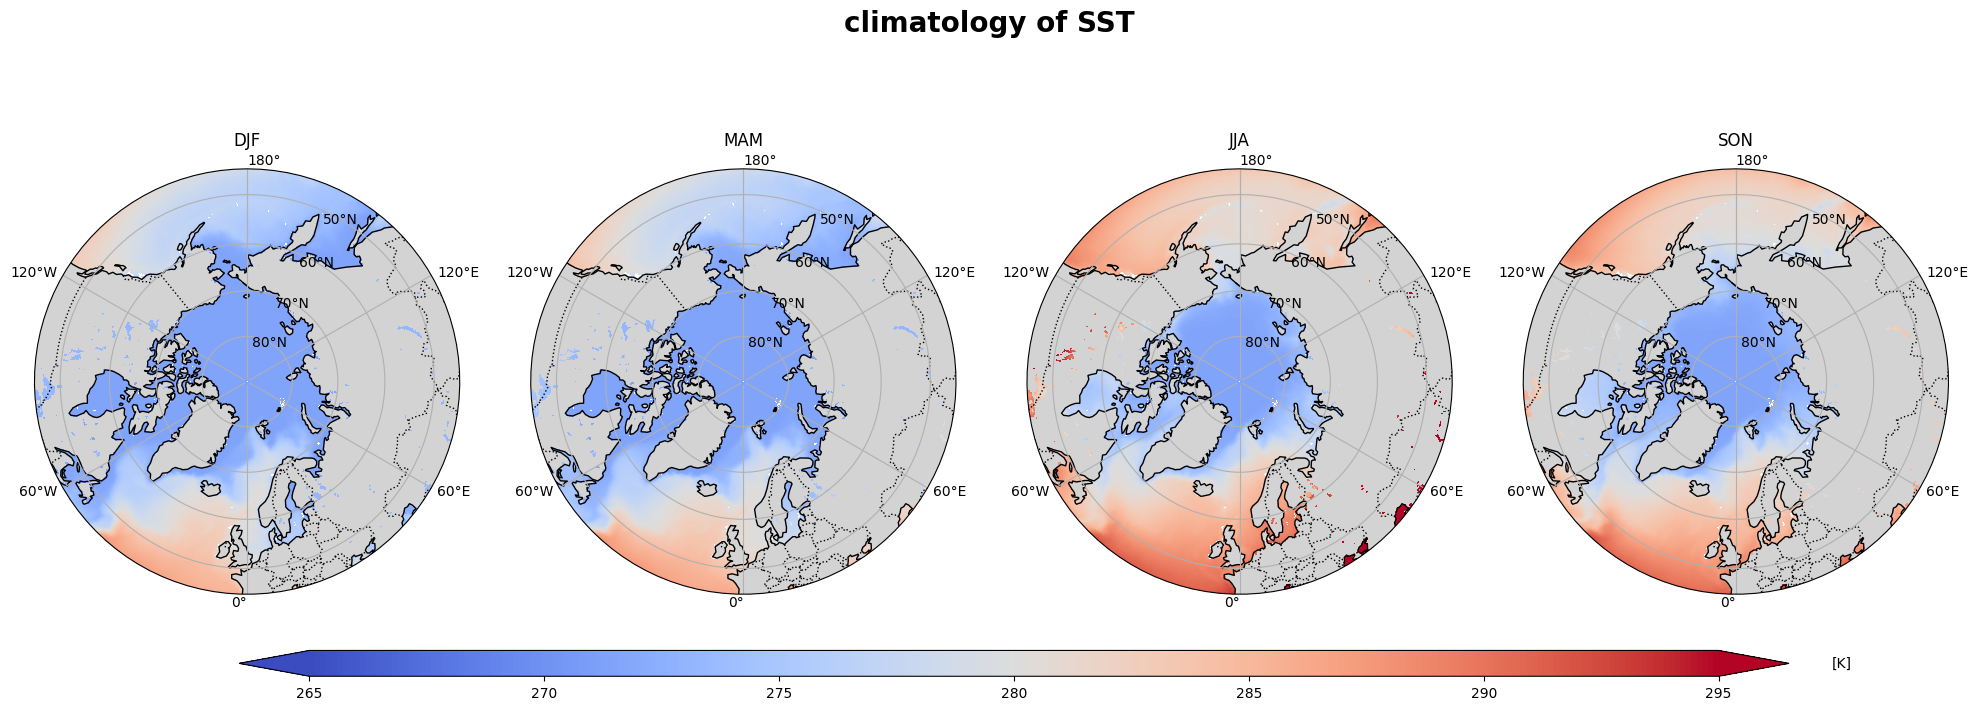

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import numpy as np

# Step 1: Load the SST data (adjust file path as needed)
file_path = "ERA5_SST_3h_monmean_7923.nc"  # Replace with your file path
ds = xr.open_dataset(file_path)

# Assume 'sst' is the variable name for sea surface temperature in the dataset
sst = ds["sst"]

# Step 2: Define the seasons and corresponding months
seasons = {
    "DJF": [12, 1, 2],  # Winter (December, January, February)
    "MAM": [3, 4, 5],    # Spring (March, April, May)
    "JJA": [6, 7, 8],    # Summer (June, July, August)
    "SON": [9, 10, 11],  # Autumn (September, October, November)
}

# Step 3: Compute the seasonal climatologies
seasonal_climatologies = {}

for season, months in seasons.items():
    if season == "DJF":  # Special handling for DJF as it spans two calendar years
        # Shift December to the previous year for proper grouping
        shifted_time = sst["time.month"] - 1
        sst = sst.assign_coords({"shifted_time": shifted_time})
        data = sst.where(sst["shifted_time"].isin(months), drop=True)
    else:
        data = sst.where(sst["time.month"].isin(months), drop=True)

    # Compute the mean over time for each season
    seasonal_climatologies[season] = data.mean(dim="time")

# Step 4: Plot the seasonal climatologies with circular boundary
fig, axes = plt.subplots(1, 4, figsize=(20, 8), subplot_kw={"projection": ccrs.NorthPolarStereo()})
fig.suptitle(
    "climatology of SST",
    fontsize=20,
    fontweight='bold',
    y=0.95  # Adjust vertical position of the title
)
# Create a circular boundary path
theta = np.linspace(0, 2 * np.pi, 100)
center = [0.5, 0.5]
radius = 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Set color range for all plots
vmin, vmax = 265, 295  # Uniform color bar range for all subplots

# Loop through each subplot, plotting the seasonal climatology
for i, (season, sst_clim) in enumerate(seasonal_climatologies.items()):
    ax = axes[i]
    plot = sst_clim.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm",
        vmin=vmin, vmax=vmax,
        add_colorbar=False  # Disable automatic color bar
    )
    ax.set_title(f"{season}")
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, color="lightgrey")
    gl =ax.gridlines(draw_labels=True)
    gl.xlabel_style = {"rotation": 0}
    gl.ylabel_style = {"rotation": 0}
    # Add circular boundary (keep aspect ratio equal)
    ax.set_boundary(circle, transform=ax.transAxes)

    # Set the aspect ratio to be equal (circular)
    #ax.set_aspect('equal')

    # Set the extent to show longitudes 0 to 180 and latitudes 45 to 90
    ax.set_extent([-180, 180, 45, 90], crs=ccrs.PlateCarree())  # Longitude: 0 to 180, Latitude: 45 to 90

# Add a single shared color bar below the plots
cbar = fig.colorbar(plot, ax=axes, orientation='horizontal', pad=0.1, fraction=0.05, aspect=60, extend = 'both')
cbar.ax.text(
    1.08, 0.5,  # Position to the right of the colorbar (relative to the axes)
    '[K]',       # The label text
    transform=cbar.ax.transAxes,  # Use axes coordinates
    ha='left',    # Horizontal alignment
    va='center',# Vertical alignment
)
#cbar.set_label('(K)', loc='right')
cbar.ax.tick_params(labelsize=10)

# Adjust layout and display
plt.tight_layout(rect=[0, 0.2, 1, 0.95])  # Adjust for colorbar space
plt.show()


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\HP\AppData\Local\Temp\ipykernel_16348\4075099914.py:95: UserWarning: This figure includes Axes that are not

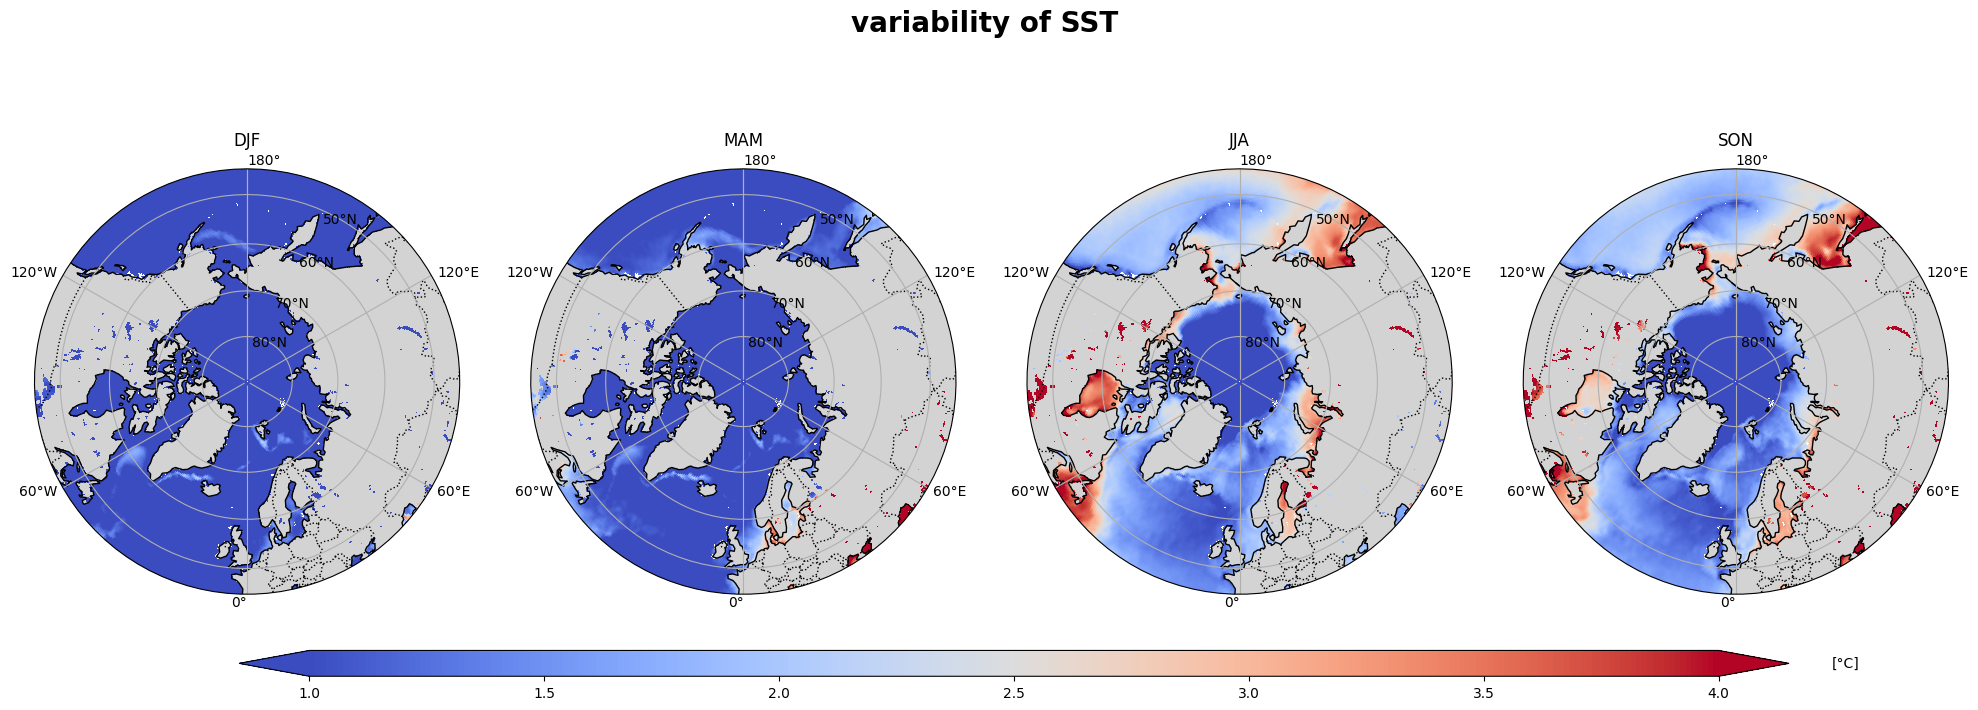

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import numpy as np

# Step 1: Load the SST data (adjust file path as needed)
file_path = "ERA5_SST_3h_monmean_7923.nc"  # Replace with your file path
ds = xr.open_dataset(file_path)

# Assume 'sst' is the variable name for sea surface temperature in the dataset
sst = ds["sst"]

# Step 2: Define the seasons and corresponding months
seasons = {
    "DJF": [12, 1, 2],  # Winter (December, January, February)
    "MAM": [3, 4, 5],    # Spring (March, April, May)
    "JJA": [6, 7, 8],    # Summer (June, July, August)
    "SON": [9, 10, 11],  # Autumn (September, October, November)
}

# Step 3: Compute the seasonal climatologies
seasonal_climatologies = {}

for season, months in seasons.items():
    if season == "DJF":  # Special handling for DJF as it spans two calendar years
        # Shift December to the previous year for proper grouping
        shifted_time = sst["time.month"] - 1
        sst = sst.assign_coords({"shifted_time": shifted_time})
        data = sst.where(sst["shifted_time"].isin(months), drop=True)
    else:
        data = sst.where(sst["time.month"].isin(months), drop=True)

    # Compute the mean over time for each season
    seasonal_climatologies[season] = data.std(dim="time")

# Step 4: Plot the seasonal climatologies with circular boundary
fig, axes = plt.subplots(1, 4, figsize=(20, 8), subplot_kw={"projection": ccrs.NorthPolarStereo()})
fig.suptitle(
    "variability of SST ",
    fontsize=20,
    fontweight='bold',
    y=0.95  # Adjust vertical position of the title
)
# Create a circular boundary path
theta = np.linspace(0, 2 * np.pi, 100)
center = [0.5, 0.5]
radius = 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Set color range for all plots
vmin, vmax =1, 4  # Uniform color bar range for all subplots

# Loop through each subplot, plotting the seasonal climatology
for i, (season, sst_clim) in enumerate(seasonal_climatologies.items()):
    ax = axes[i]
    plot = sst_clim.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm",
        vmin=vmin, vmax=vmax,
        add_colorbar=False  # Disable automatic color bar
    )
    ax.set_title(f"{season}")
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, color="lightgrey")
    gl =ax.gridlines(draw_labels=True)
    gl.xlabel_style = {"rotation": 0}
    gl.ylabel_style = {"rotation": 0}
    # Add circular boundary (keep aspect ratio equal)
    ax.set_boundary(circle, transform=ax.transAxes)

    # Set the aspect ratio to be equal (circular)
    #ax.set_aspect('equal')

    # Set the extent to show longitudes 0 to 180 and latitudes 45 to 90
    ax.set_extent([-180, 180, 45, 90], crs=ccrs.PlateCarree())  # Longitude: 0 to 180, Latitude: 45 to 90

# Add a single shared color bar below the plots
cbar = fig.colorbar(plot, ax=axes, orientation='horizontal', pad=0.1, fraction=0.05, aspect=60, extend = 'both')
cbar.ax.text(
    1.08, 0.5,  # Position to the right of the colorbar (relative to the axes)
    '[°C]',       # The label text
    transform=cbar.ax.transAxes,  # Use axes coordinates
    ha='left',    # Horizontal alignment
    va='center',# Vertical alignment
)
#cbar.set_label('(K)', loc='right')
cbar.ax.tick_params(labelsize=10)

# Adjust layout and display
plt.tight_layout(rect=[0, 0.2, 1, 0.95])  # Adjust for colorbar space
plt.show()


## 5. Determine the correlation between two specified variables to gain insights into their relationship

Variables in the dataset: ['time_bnds', 'sst']
Correlation coefficient: 0.61
P-value: 1.191e-56
The correlation is statistically significant.


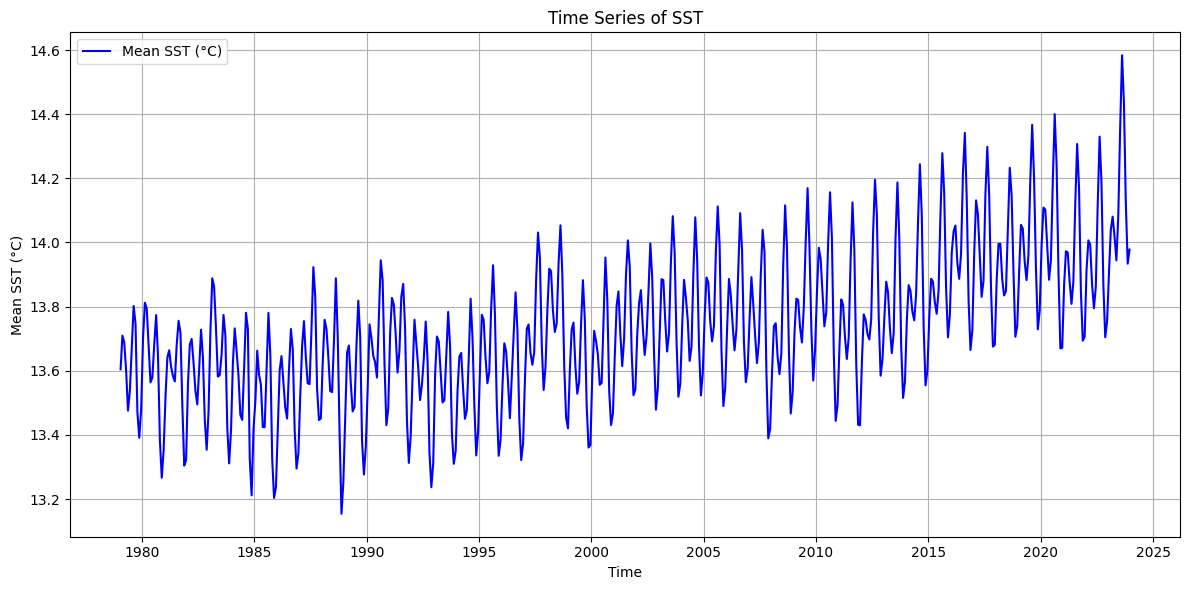

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# File path to the NetCDF file
file_name = "ERA5_SST_3h_monmean_7923.nc"  # Replace with your actual file path

# Load the NetCDF file
ds = xr.open_dataset(file_name)

# List the variables available in the dataset
print("Variables in the dataset:", list(ds.data_vars))

# Extract the Sea Surface Temperature (SST) data in Kelvin
sst = ds['sst']  # SST data (time, latitude, longitude)

# Convert SST from Kelvin to Celsius
sst_celsius = sst - 273.15

# Step 1: Calculate the mean SST over latitude and longitude for each time step
mean_sst = sst_celsius.mean(dim=['latitude', 'longitude'])

# Step 2: Extract the time values (assuming time is already in a suitable format)
time = ds['time'].values

# Step 3: Convert numpy.datetime64 to numeric (Unix timestamps)
time_numeric = time.astype('int64')  # Convert datetime64 to nanoseconds since epoch

# Step 4: Calculate the Pearson correlation coefficient between time and mean SST
corr_coeff, p_value = pearsonr(time_numeric, mean_sst.values)

# Print the results
print(f"Correlation coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value:.3e}")

# Interpret the correlation significance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Step 5: Plot the time series of mean SST (in Celsius) over time
plt.figure(figsize=(12, 6))
plt.plot(ds['time'], mean_sst, label='Mean SST (°C)', color='blue')
plt.xlabel('Time')
plt.ylabel('Mean SST (°C)')
plt.title('Time Series of SST')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# File path to the NetCDF file
file_name = "ERA5_SST_3h_monmean_7923.nc"  # Replace with your actual file path

# Load the NetCDF file
ds = xr.open_dataset(file_name)

# List the variables available in the dataset
print("Variables in the dataset:", list(ds.data_vars))

# Extract the Sea Surface Temperature (SST) data in Kelvin
sst = ds['sst']  # SST data (time, latitude, longitude)

# Convert SST from Kelvin to Celsius
sst_celsius = sst - 273.15

# Step 1: Calculate the mean SST over latitude and longitude for each time step
mean_sst = sst_celsius.mean(dim=['latitude', 'longitude'])

# Step 2: Extract the time values (assuming time is already in a suitable format)
time = ds['time'].values

# Step 3: Convert numpy.datetime64 to numeric (Unix timestamps)
time_numeric = time.astype('int64')  # Convert datetime64 to nanoseconds since epoch

# Step 4: Calculate the Pearson correlation coefficient between time and mean SST
corr_coeff, p_value = pearsonr(time_numeric, mean_sst.values)

# Print the results
print(f"Correlation coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value:.3e}")

# Interpret the correlation significance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Step 5: Plot a heatmap of Mean SST values over time (using seaborn)
# We need to reshape the data to fit into a 2D array for the heatmap
mean_sst_reshaped = mean_sst.values.reshape(-1, 1)  # Reshaping for heatmap (single column)
time_reshaped = time_numeric.reshape(-1, 1)  # Reshaping time into a 2D array (single column)

# Create a dataframe for seaborn heatmap
import pandas as pd
heatmap_data = pd.DataFrame(np.concatenate([time_reshaped, mean_sst_reshaped], axis=1), columns=['Time', 'Mean SST (°C)'])

# Create the heatmap plot
plt.figure(figsize=(6, 3))
sns.heatmap(heatmap_data.corr(), annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)

# Title and labels
plt.title("Heatmap of Correlation between Time and Mean SST (°C)")
plt.xlabel("Time")
plt.ylabel("Mean SST (°C)")

plt.tight_layout()
plt.show()


Variables in the dataset: ['time_bnds', 'sst']
